In [ ]:
#Dependencies
import pandas as pd
import glob
import numpy as np
from bs4 import BeautifulSoup as bs
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt



In [ ]:
#Open the html files
all_files = []

files = glob.glob('/content/drive/MyDrive/html_job_postings/*')
for file_name in files:
  with open(file_name, 'r') as f:
    contents = f.read()
    all_files.append(contents)

print(f"Loaded {len(all_files)} HTML files.")

Loaded 1337 HTML files.


In [ ]:
all_html = []

for html in all_files:
  soup = bs(html)
  all_html.append(soup)
print(all_html[1])

<html><head><title>Data Science QA Engineer - San Jose, CA 95112</title></head>
<body><h2>Data Science QA Engineer - San Jose, CA 95112</h2>
<p><b>COMPANY OVERVIEW</b></p><p>
RSi is a leading provider of retail data science-based analytics and a big data management platform that helps top retailers and CPG companies manage their supply chain and marketing initiatives to drive sales results. Using machine learning, streaming analytics and predictive models, we are the go-to cloud-based peta-scale SaaS platform in the retail industry. Join our team as a QA, Data Science and join a global innovative technology leader with a strong presence in San Jose, CA.</p><p><b>
POSITION SUMMARY:</b></p><p>
The QA, Data Science is a unique position for motivated people who pay attention to details and like to apply their critical thinking and statistical knowledge to big data and machine learning models. This position is within our data science team and the individual will work with data scientists, d

In [ ]:
posting = {'Title': [], 'Body': []}

for soup in all_html:
  posting['Title'].append(soup.title.text)
  posting['Body'].append(soup.body.text)

df_new = pd.DataFrame(posting)
summary = df_new.describe()
print(summary)

                                Title                                               Body
count                            1337                                               1337
unique                           1238                                               1328
top     Data Scientist - New York, NY  Data Scientist: Deep Learning & NLP - Menlo Pa...
freq                               13                                                  2


In [ ]:
all_bullets = []
for soup in all_html:
  new_bullets = []
  for bullet in soup.find_all('li'):
    new_bullets.append(bullet.text.strip())
  all_bullets.append(new_bullets)

df_new['Bullets'] = all_bullets
df_new['Bullets'] = df_new['Bullets'].apply(tuple, 1)
print(df_new.Bullets)


0       (Apply to become a tutor listed on Wyzant to h...
1       (Design and implement software for QA of ML da...
2       (Undergraduate or graduate degree in a relevan...
3       (Bootstrapping our company DevOps culture and ...
4       (Responsible for configuration management work...
                              ...                        
1332    (Partner with the Marketing and Data Engineeri...
1333                                                   ()
1334    (Responsible for collaborating with the Direct...
1335    (2 years of experience in data analysis, visua...
1336    (Hands-on experience with industry-standard pr...
Name: Bullets, Length: 1337, dtype: object


In [ ]:
print(df_new)

                                                  Title  ...                                            Bullets
0              Tutor or Teacher - R - Chicago, IL 60611  ...  (Apply to become a tutor listed on Wyzant to h...
1         Data Science QA Engineer - San Jose, CA 95112  ...  (Design and implement software for QA of ML da...
2     Quantitative Analyst-Football Operations - Phi...  ...  (Undergraduate or graduate degree in a relevan...
3     Member of Technical Staff, Devops Engineer - S...  ...  (Bootstrapping our company DevOps culture and ...
4     Infrastructure Engineer II - Core - San Franci...  ...  (Responsible for configuration management work...
...                                                 ...  ...                                                ...
1332       Senior Data Analyst, Marketing - Oakland, CA  ...  (Partner with the Marketing and Data Engineeri...
1333  Health and Human Services Technician I- Biling...  ...                                            

In [ ]:
df_new.head()

,Title,Body,Bullets
0,"Tutor or Teacher - R - Chicago, IL 60611","Tutor or Teacher - R - Chicago, IL 60611\nI ne...",(Apply to become a tutor listed on Wyzant to h...
1,"Data Science QA Engineer - San Jose, CA 95112","Data Science QA Engineer - San Jose, CA 95112\...",(Design and implement software for QA of ML da...
2,Quantitative Analyst-Football Operations - Phi...,Quantitative Analyst-Football Operations - Phi...,(Undergraduate or graduate degree in a relevan...
3,"Member of Technical Staff, Devops Engineer - S...","Member of Technical Staff, Devops Engineer - S...",(Bootstrapping our company DevOps culture and ...
4,Infrastructure Engineer II - Core - San Franci...,Infrastructure Engineer II - Core - San Franci...,(Responsible for configuration management work...


In [ ]:
df_new.drop_duplicates(inplace=True)
df_new.shape


(1328, 3)

In [ ]:
df_new = df_new[df_new['Title'].str.contains('(Data Science)|(Data Scientist)', case = False)]
df_new

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Title,Body,Bullets
1,"Data Science QA Engineer - San Jose, CA 95112","Data Science QA Engineer - San Jose, CA 95112\...",(Design and implement software for QA of ML da...
5,"Data Scientist - Digital Factory - Tampa, FL 3...","Data Scientist - Digital Factory - Tampa, FL 3...",(Use feedback and reflection to develop self a...
13,"Senior Data Scientist - Mountain View, CA 94035","Senior Data Scientist - Mountain View, CA 9403...","(Fetch and store data from web APIs, AWS, Spar..."
18,"Data Scientist - Entry Level - Sacramento, CA","Data Scientist - Entry Level - Sacramento, CA\...","(Ability to do statistical modeling, build pre..."
21,"Lead Data Scientist - Philadelphia, PA 19103","Lead Data Scientist - Philadelphia, PA 19103\n...",(Develop and deploy predictive models based on...
...,...,...,...
1323,Post-doc: Dissemination/implementation and/or ...,Post-doc: Dissemination/implementation and/or ...,()
1330,"Insurance Data Scientist - Chicago, IL 60661","Insurance Data Scientist - Chicago, IL 60661\n...",(You come in with 1-2 years of professional st...
1331,"Sr. Data Scientist - Spartanburg, SC 29306","Sr. Data Scientist - Spartanburg, SC 29306\nOv...",(Monitor consumer loan portfolio and optimize ...
1334,"Sr Director of Data Science - Elkridge, MD","Sr Director of Data Science - Elkridge, MD\nOv...",(Responsible for collaborating with the Direct...


In [ ]:
#df_new.to_csv('step1.csv')
#df_new = pd.read_csv(df_name, converters={'column_name': eval})


In [ ]:
resume = open('/content/drive/MyDrive/resume.txt', 'r').read()
print(resume)

﻿Good Student
Data Scientist
	  

Good Student
123 Fake Street
Some City, QT 12345
123.456.7890
no_reply@fakesite.com
	ㅡ
Skills
	  

Python, Pandas, machine learning, natural language processing
	ㅡ
Experience
	  

Manning / Data Analyst
Oct 2019 - PRESENT,  REMOTE
Analyzed and visualized vast amounts of data using Pandas, Python, and Matplotlib.
	ㅡ
Education
	  

Berkeley / B.S. Mathematics
August 2015 - May 2019,  BERKELEY, CA
Graduated summa cum laude.

	ㅡ
Awards
	  

Tau Beta Pi Honors Society


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
text = df_new.Body.values.tolist() + [resume]
tf_matrix = vectorizer.fit(text)
tf_matrix = tf_matrix.transform(text)
print(tf_matrix.shape)

(493, 10011)


In [ ]:
num_posts, title_size = tf_matrix.shape
print(f"Our collection of {num_posts} job postings contain a total of "
      f"{title_size} unique titles")

Our collection of 493 job postings contain a total of 10011 unique titles


In [ ]:
cosine_similarities = cosine_similarity(tf_matrix[:-1] , tf_matrix[-1])
cosine_similarities.shape

(492, 1)

In [ ]:
df_new['Relevant'] = cosine_similarities
df_sorted = df_new.sort_values(by='Relevant', ascending = False)
df_sorted.reset_index(inplace=True, drop=True)
df_sorted.shape

In [ ]:
most_similar = df_sorted.iloc[:100].copy()
most_similar[most_similar['Title'].str.contains('(data scientist)|(data science)', case=False)].shape
most_similar.head()

In [ ]:
#df_sorted.to_pickle('step2'.pk)

In [ ]:
bullet_points = []
for sublist in most_similar['Bullets']:
  for item in sublist:
    bullet_points.append(item)
len(bullet_points)

1747

In [ ]:
bullet_vector = TfidfVectorizer(stop_words='english')
similar_skills = bullet_vector.fit_transform(bullet_points)
similar_skills.shape

(1747, 2618)

In [ ]:
svd_object = TruncatedSVD(n_components=100)
svd_transform_matrix = svd_object.fit_transform(similar_skills)
svd_transform_matrix.shape

(1747, 100)

In [ ]:
svd_norm_matrix = Normalizer().fit_transform(svd_transform_matrix)
svd_norm_matrix.shape

(1747, 100)

In [ ]:
svd_cosine_similarity = svd_norm_matrix[:-1] @ svd_norm_matrix[-1].T
svd_cosine_similarity.shape

(1746,)

In [ ]:
clusters = 6
k_means_model = KMeans(n_clusters=clusters)
k_clusters = k_means_model.fit(svd_norm_matrix)
clusters_label = pd.DataFrame({'Cluster': k_clusters.labels_})
clusters_label.head()

,Cluster
0,0
1,3
2,0
3,4
4,0


In [ ]:
def rank_words_by_tfidf(indices, tfidf_matrix=similar_skills,
  word_list=bullet_vector.get_feature_names()):
  summed_tfidf = np.asarray(tfidf_matrix[indices].sum(axis=0))[0]
  data = {'Word': word_list, 'Summed TFIDF': summed_tfidf}
  return pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)

In [ ]:
def cluster_to_image(df_cluster, max_words=15):
  indices = df_cluster.index.values
# get TFIDF-ranked words
  df_ranked_words = rank_words_by_tfidf(indices)[:max_words]
# create word-to-TFIDF value dictionary for the word cloud
  words_to_score = {word: score
    for word, score in df_ranked_words[:max_words].values
    if score != 0}
# generate the word cloud
  cloud_generator = WordCloud(background_color='white',
  color_func=_color_func,
  random_state=1)
  wordcloud_image = cloud_generator.fit_words(words_to_score)
  return wordcloud_image, words_to_score

In [ ]:
def _color_func(*args, **kwargs):
# a small function to change the color of the word clouds
  return np.random.choice(['black', 'blue', 'teal', 'purple', 'brown'])

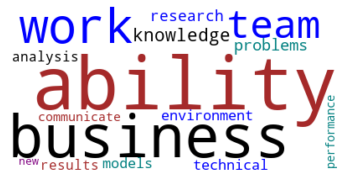

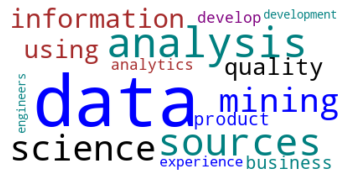

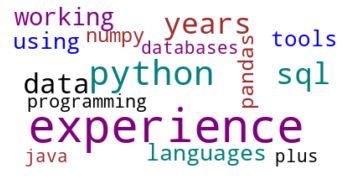

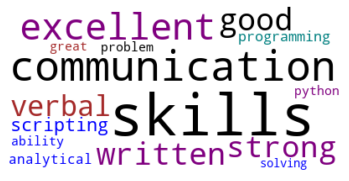

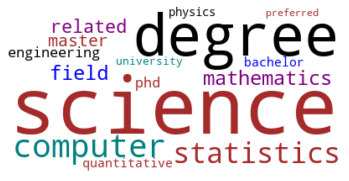

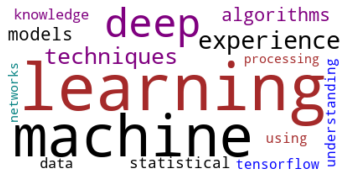

In [ ]:
docs_in_clusters = []
word_dictionaries = []
for c in range(clusters):
  df_cluster = clusters_label[clusters_label.Cluster == c]
  wordcloud_image, words_to_score = cluster_to_image(df_cluster)
  word_dictionaries.append(words_to_score)
  plt.imshow(wordcloud_image, interpolation="bilinear")
  plt.axis('off')
  plt.show()
# we get the number of documents in each cluster
# for analysis of how well distributed the clusters are
  docs = np.where(k_clusters.labels_ == c)[0]
  docs_in_clusters.append(len(docs))